# Data 3406 Assignment 2 Topic Two: PeerWise Groups

---

Charlie Lorimer, Abdullah Safi, Yan Yu, Natasha Tanudji, Johanna Jones, Taron Ling

## What are the impacts of group membership for performance using PeerWise?

# Table of Contents
---

1. Introduction and context of data
2. Loading required files and packages
3. Data Cleaning and Testing
4. Exploration of dataset
5. Data Analysis
  1. Student Improvement in Cycle 4
      1. Student question performance
      2. Student Motivation
  5. Group Performance
      1. Team Correctness
  2. Motivation
      1. Lateness of Comments
      2. Lateness of Questions
  4. Identifying Useful Comments
6. Conclusions

# 1. Introduction and context of data
---

-  Gareth Denyer has made extensive use of PeerWise in large classes at Sydney University. He has a set of de-identified data for students who worked in groups which he has classified in terms of their motivation and achievement levels. The data available is from internal PeerWise logs and final exams. Gareth has agreed to be available to discuss this topic with groups taking it on. Students who want to do this project need to be linked to the ethics processes for analysing this data.

- Safi, Start: 08-11-2020, End: 09-11-2020


There was a total of 4 cycles throughout the entire course which all had different tasks to complete which are listed below:
- For cycle 1, students were tasked with recognising good or bad questions by 
finding a question from resources such as a textbook or the internet and submitting it to PeerWise. Furthermore, they had to comment on a question and provide feedback.
- Cycle 2 was similar to cycle 1 except students now had to create a question by themselves as well as providing actionable feedback for their peers.
- In Cycle 3 students were required to answer questions from the previous cycle.
- Finally, for cycle 4, students were put into non-random groups and tasked with creating a question as well as answering a question.

- Yu, Start: 08-11-2020, End: 09-11-2020

Our interest and analysis is to determine if group memberships have any impact on performance when using PeerWise, to do this we will first have to load and clean our data.

# 2. Loading required files and packages

---

In [1]:
# Data loading/processing/manipulation
import pandas as pd 
import numpy as np

# Plotting
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

# Everyone, Start: 10-11-2020, End: 10-11-2020


Below is where we plan to load all of our data so that we are able to use it for our analysis
- Everyone, Start:09-11-2020, End: 09-11-2020


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Courses
path = "/content/drive/MyDrive/DATA3406-Assignment-2/"
c1courses = pd.read_excel(path+ "data/Cycle 1/C1 Courses.xlsx")
c2courses = pd.read_excel(path+ "data/Cycle 2/C2 Courses.xlsx")
c3courses = pd.read_excel(path+ "data/Cycle 3/C3 Courses.xlsx")
c4courses = pd.read_excel(path+ "data/Cycle 4/C4Courses.xlsx")

# Questions
c1questions = pd.read_excel(path+ "data/Cycle 1/C1 Questions.xlsx")
c2questions = pd.read_excel(path+ "data/Cycle 2/C2 Questions.xlsx")
c3questions = pd.read_excel(path+ "data/Cycle 3/C3 Questions.xlsx")
c4questions = pd.read_excel(path+ "data/Cycle 4/C4Questions.xlsx")

#Answers
c3answers = pd.read_excel(path+ "data/Cycle 3/C3 Answers.xlsx")

#Comments
c1comments = pd.read_excel(path+ "data/Cycle 1/C1 Comments.xlsx")
c2comments = pd.read_excel(path+ "data/Cycle 2/C2 Comments.xlsx")
c4comments = pd.read_excel(path+ "data/Cycle 4/C4Comments.xlsx")

# UserCourses
c2usercourses = pd.read_excel(path+ "data/Cycle 2/C2 UsersCourses.xlsx")
c4usercourses = pd.read_excel(path+ "data/Cycle 4/C4UsersCourses.xlsx")

# Everyone, Start: 10-11-2020, End: 10-11-2020

From this cell above, the data was successfully loaded and that we are able to now use it for our analysis. The dataframes are stored in variables starting with "c" and a number, representing the cycle number. For exmaple the question dataframe from c4 is named `c4questions`.
- Everyone, Start: 09-11-2020. End: 09-11-2020

Now that we have finished loading the data we need to define some rules about the appoach we will take to clean it.
- Safi, Start: 12-11-2020, End: 17-11-2020

# 3. Data Cleaning and Testing
---

Basic data cleaning was utilised throughout our analysis which is all listed below:
- For our dataset, 0 and missing data values were simply ignored since a lot of the time they were not used. Furthermore, by simply ignoring them, the functions we used to make calculations would automatically deal with them and not produce any errors.
- In terms of outliers, we chose to keep them as we would be able to utilise it later in the analysis since the data was already validated and they would not have much of an impact in our analysis.
- In regards to transforming the data, the `merge`, `rename`, `drop` functions were all utilised throughout our analysis in order to access all the data in one table as well as making variable names consistent throughout the dataset.
- For testing we did not have any functions that we could test on.
- This means that we do not have have any testing cells.
- All outputs will contain the default number of **significant figures**. This is because we want to preserve the most accurate results to help form our analysis conclusions.

- Yu, Start: 10-11-2020, End: 10-11-2020

# 4. Exploration of Dataset
---


In this section we will outline the structure of the data and then provide an intial investigation with some data summaries. This helps us understand the data as we push to answer our driving question. 
- Safi, Start: 12-11-2020, End: 17-11-2020

**Structure of the data**

There are different data files for each cycle. As explained above, each cycle had a different task the students were required to complete. 

Within each cycle there were different data files (this sometimes varied depending on the cycle):

>- **Comments data:** Comment data including the author, the question it was posted on, the time it was posted, and the content of the comment
>- **Edits data:** Data about edits to questions including the id of the old question, id of the new question, and the time the edit was made
>- **Ratings data:** Data of ratings on questions including the question id, rater id, and the quality/difficulty score given
>- **Tags data**: Data of the tags on questions including the tag, question id, and tag id
>- **Courses data:** Data of each course including the course name, course id, and relevant start/due dates for the cycles
>- **Questions data:** Data about questions posted by students
>- **Courses data:** Data of each course including the course name, course id, and relevant start/due dates for the cycles

Soon, we'll investigate some of these data files in more detail.

- Lorimer, Start: 10-11-2020, End: 10-11-2020




**Joining/merging the files:**
- We will be able to merge the files together based on the unique id columns that exist throughout each of the files
- For example it will be possible to join the user-courses data with the comments data to find out the team allocated to the author of each comment
- Everyone, Start: 10-11-2020, End: 10-11-2020


Now we'll look at briefy exploring the Questions datasets from each of the cycles:

**Questions data:** 

Data about questions posted by students

In [4]:
display(c1questions.head(n=2)) # Cycle 1
display(c2questions.head(n=2)) # Cycle 2
display(c3questions.head(n=2)) # Cycle 3
display(c4questions.head(n=2)) # Cycle 4

# Everyone, Start: 10-11-2020, End: 10-11-2020

,id,course_id,timestamp,user,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,numAlts,question,altA,altB,altC,altD,altE,explanation
0,4342368,20995,2020-03-04 17:52:14,217514,0.0,0,0,0,0.00,0,2,A,4,<p>[2a] In early 1950s high quality X-ray dif...,<p>Rosalind Franklin<br /><br /></p> ...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...
1,4342370,20995,2020-03-04 17:52:14,217514,0.5,7,4,0,0.25,5,0,A,4,<p>[Table X - Topic 2a] In early 1950s high q...,<p>Rosalind Franklin<br /><br /></p> ...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...


,id,course_id,timestamp,user,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation
0,4391826,21140,2020-03-26 19:10:48,636022,3.5,5,2,0,0.5,3,0,B,<p>Which of the following pair includes a pha...,4,"<p>G1 phase, DNA replication</p> ...","<p>G2 phase, preparation for mitosis</p> ...","<p>S phase, cell division</p> ...","<p>M phase, cell growth</p> ...",...,<p>G1 phase is growth and preparation of the ...
1,4392006,21140,2020-03-26 20:54:26,636011,3.5,8,6,1,1.0,6,2,D,<p>A telomere has a repetitive nucleotide seq...,5,"<p>4, 3, 1, 2, 5</p> ...","<p>1, 2, 3, 4, 5</p> ...","<p>2, 5, 4, 1, 3</p> ...","<p>4, 2, 1, 3, 5</p> ...","<p>2, 4, 1, 5, 3</p> ...",<p>The correct answer is D with steps numbere...


,id,course_id,timestamp,user,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation
0,4421360,21230,2020-04-07 22:29:54,217514,2.50,29,20,1,0.7500,2,0,B,The telomeric repeat sequence in green algae ...,5,<p>5&prime; UUUUAGGGUUUU 3&prime;<br /><br />...,<p>5&prime; CCCUAAAACCCU 3&prime;<br /><br />...,<p>5&prime; CCCTAAAACCCT 3&prime;<br /><br />...,<p>5&prime; TTTTAGGGTTTT 3&prime;<br /><br />...,<p>5&prime; AGGGTTTTAGGG 3&prime;</p> ...,<p>no explanation</p> ...
1,4421361,21230,2020-04-07 22:30:18,217514,3.27,37,22,3,0.9091,1,0,D,Which of the following types of protein could...,4,<p>A protein which forms part of a growth fac...,<p>A protein which codes for a DNA repair enz...,<p>A protein which helps prevent apoptosis.</...,<p>A protein which controls progression throu...,...,<p>Tumour suppressor genes code for proteins ...


,id,course_id,timestamp,user,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation,AcademicMark
0,4464532,21320,2020-04-27 18:51:25,635990,3.78,10,9,2,1.2222,8,2,D,Operons are a series of related genes that are...,4,A,B,C,D,NaN,<p>Because the bacteria only wants to make th...,NaN
1,4464967,21320,2020-04-27 22:56:37,636029,3.25,7,4,1,0.7500,5,2,D,The sigma (&sigma;) subunit is required for th...,5,The &sigma; subunit decreases the general;affi...,The &sigma; subunit recognizes the promoter se...,The &sigma; subunit can be reused again and ag...,The &sigma; subunit clings onto the core polym...,Binding of the sigma subunit is an important s...,<p>The sigma subunit can direct the tight bin...,NaN


Here we observe some key variables that may serve as potential to answer our driving question. These variables include:
-  `avg_rating`
- `timestamp`
- `total_responses`
- `total_rating_count`
- `total_comments`
- `Academic mark `

- Everyone, Start: 10-11-2020, End: 10-11-2020


Now let's look at the User-Courses data file.

**User-Courses data:** 

The User-Courses data provides us with information about which course each student is studying. For cycle 4, it also contains information on which team a student belongs to. 

Below we will observe the the data types, change them accordingly and apply them to further EDA.

- Everyone, Start: 10-11-2020, End: 10-11-2020


In [5]:
c4usercourses_new = c4usercourses
# Data types
c4usercourses_new.dtypes
# Update the data types
c4usercourses_new.user = c4usercourses_new.user.astype(str)
c4usercourses_new.course_id = c4usercourses_new.course_id.astype(str)
c4usercourses_new.dtypes

# Everyone, Start: 10-11-2020, End: 10-11-2020


user         object
course_id    object
Team         object
dtype: object

Now that we we understand the general structure of our data, we are able to fix some data types within our columns so that we can briefly explore the data with some numerical summaries and data visualisations.

**Numerical summaries**

After updating data types in our columns, we can effectively use `data.describe()` to learn more about the questions data and its numerical values.

*Please note, that in our intermediary analysis, these steps were applied to all data sets.*

- Everyone, Start: 10-11-2020, End: 10-11-2020

In [6]:
c4questions_new = c4questions.copy()
# Check data types and update them
c4questions_new.dtypes
c4questions_new.id = c4questions_new.id.astype(str)
c4questions_new.course_id = c4questions_new.course_id.astype(str)
c4questions_new.user = c4questions_new.user.astype(str)
display(c4questions_new.dtypes)
display(c4questions_new.describe())

# Everyone, Start: 10-11-2020, End: 10-11-2020

id                   object
course_id            object
timestamp            object
user                 object
avg_rating          float64
total_responses       int64
total_ratings         int64
top_rating_count      int64
avg_difficulty      float64
total_comments        int64
deleted               int64
answer               object
question             object
numAlts               int64
altA                 object
altB                 object
altC                 object
altD                 object
altE                 object
explanation          object
AcademicMark        float64
dtype: object

,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,numAlts,AcademicMark
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,292.000000
mean,3.015560,5.272388,4.166045,0.248134,0.563089,4.322761,0.889925,4.455224,3.763699
std,1.122415,3.881476,3.216262,0.570290,0.513441,3.706312,0.986361,0.509582,0.800977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,2.570000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000
50%,3.000000,5.000000,3.000000,0.000000,0.500000,3.000000,0.000000,4.000000,4.000000
75%,3.750000,9.000000,7.000000,0.000000,1.000000,8.000000,2.000000,5.000000,4.000000
max,5.000000,14.000000,12.000000,5.000000,2.000000,18.000000,2.000000,5.000000,5.000000


From the output above we can see that:
- There are 536 questions in cycle 4. Of these, only 296 of them received an academic mark.
- The mean rating of questions in cycle 4 was 3.02 (2dp)
- The mean academic mark of questions in cycle 4 was 3.76 (2dp)
- Additional summary statistics can be read from the table above

- Everyone, Start: 10-11-2020, End: 10-11-2020

**Data Visualisations:**

Distribution of students in Cycle 4 groups:

In order to visualise our data nicely we need to select the relevant columns and join some data sources together using the methods outlined in an earlier section. See the cell below for the joining and column selection for our exploratory data visualisations.

- Everyone, Start: 10-11-2020, End: 10-11-2020

In [7]:
# Selecting wanted variables for exploratory analysis
# Joining user-courses and questions together
users_qs = c4questions_new[['course_id', 'id', 'user', 'avg_rating', 'total_responses', 'total_comments']].merge(c4usercourses_new, how="inner", on="user")
users_qs.head()

# Everyone, Start: 10-11-2020, End: 10-11-2020

,course_id_x,id,user,avg_rating,total_responses,total_comments,course_id_y,Team
0,21320,4464532,635990,3.78,10,8,21320,Brown
1,21320,4483763,635990,3.75,4,2,21320,Brown
2,21320,4464967,636029,3.25,7,5,21320,Pink
3,21320,4480828,636029,0.00,0,0,21320,Pink
4,21320,4480830,636029,3.40,9,3,21320,Pink


Now that we have the dataframes joined and have selected the columns we want for the questiosn data. We will do the same for the comments data so we can investigate the number and distribution of comments.

- Everyone, Start: 10-11-2020, End: 10-11-2020


In [8]:
# Grouping total comments and responses by assigned groups
resp_comments = users_qs[['id', 'user', 'total_responses', 'total_comments', 'Team']]
resp_comments.head(n=3)
# Everyone, Start: 10-11-2020, End: 10-11-2020


,id,user,total_responses,total_comments,Team
0,4464532,635990,10,8,Brown
1,4483763,635990,4,2,Brown
2,4464967,636029,7,5,Pink


As we have joined and select columns from the necessary data. We are now able to group this dataframe by the team name so we can count the number of users in each team.

- Everyone, Start: 10-11-2020, End: 10-11-2020

In [9]:
# Count the number of students in each group
group_no = resp_comments.groupby('Team', as_index=False)['user'].nunique()
group_no.sort_values(by='user', ascending=False)

# Everyone, Start: 10-11-2020, End: 10-11-2020


,Team,user
3,Green,37
4,Pink,37
6,Red,37
2,Brown,36
0,Black,35
1,Blue,33
8,Yellow,31
7,White,23
5,Purple,15


This can be visualised in a bar graph below where we can view the group differences.
- Safi, Start: 12-11-2020, End: 17-11-2020

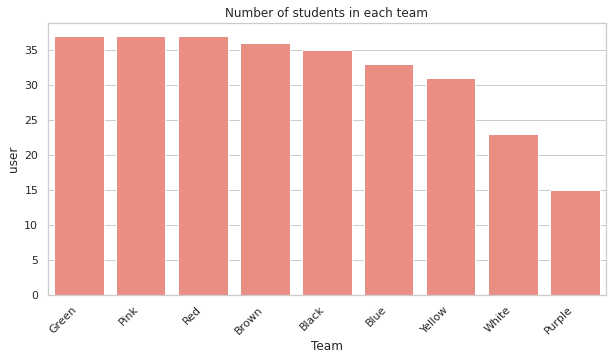

In [10]:
# Distribution of students in each group
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
chart = sns.barplot(x="Team", y ="user", data=group_no.sort_values(by='user', ascending=False), color = "salmon")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Number of students in each team")
plt.show()

# Everyone, Start: 10-11-2020, End: 10-11-2020


Above from the output table and bar graph, we can see that green, pink, and red teams had the most members (with 37). Purple team on the other hand was drastically smaller than the other teams, with only 14 members.

- Everyone, Start: 10-11-2020, End: 10-11-2020

We concluded that using the mean was redundant and uninformative. Below we will use the median as a more robust measure to investigate the median number of authored questions and comments in cycle 4.

- Everyone, Start: 10-11-2020, End: 10-11-2020

**Median number of questions/comments:**

Below are cells to calculate the median number of resposnes/comments within each of the teams. This will help us understand if the teams are of similar academic ability. The summaries will be output in a tablue (dataframe) format, as well as with two seperate bar plots.

- Everyone, Start: 10-11-2020, End: 10-11-2020

In [11]:
median_resp_comments = resp_comments.groupby('Team', as_index=False).median()
group_no['total_responses'] = median_resp_comments['total_responses']
group_no['total_comments'] = median_resp_comments['total_comments']
display(group_no)

# Everyone, Start: 10-11-2020, End: 10-11-2020


,Team,user,total_responses,total_comments
0,Black,35,5.5,4.5
1,Blue,33,3.0,3.0
2,Brown,36,4.0,3.0
3,Green,37,7.0,4.0
4,Pink,37,5.0,3.0
5,Purple,15,3.0,2.0
6,Red,37,7.0,6.0
7,White,23,3.0,2.0
8,Yellow,31,4.0,3.0


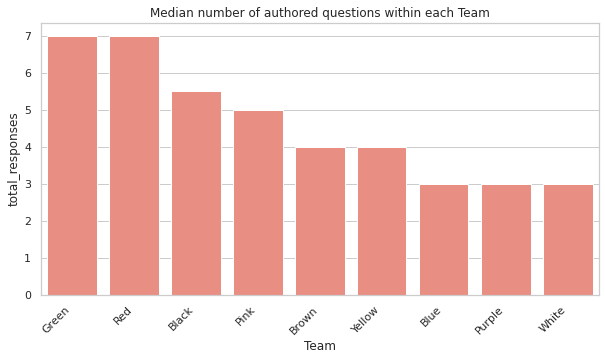

In [12]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
chart = sns.barplot(x="Team", y= "total_responses", data=group_no.sort_values(by='total_responses', ascending=False), color = "salmon")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Median number of authored questions within each Team")
plt.show()

# Everyone, Start: 10-11-2020, End: 10-11-2020

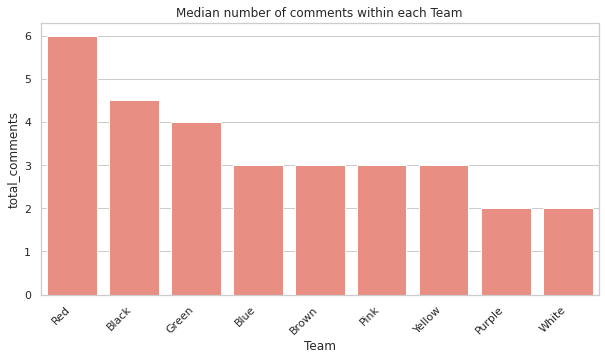

In [13]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
chart = sns.barplot(x="Team", y= "total_comments", data=group_no.sort_values(by='total_comments', ascending=False), color = "salmon")
chart.set_xticklabels(chart.get_xticklabels(), rotation =45, horizontalalignment='right')
plt.title("Median number of comments within each Team")
plt.show()

# Everyone, Start: 10-11-2020, End: 10-11-2020


**Key Observations:**

From the above two plots that depict the total comments and responses to each question authored, we observe noticeable variation between each of the group.


The Red team is the most active in commenting and responding.
The Purple team is in both cases is the least active in commenting and responding. 
One possible reason for this discrepancy between teams, is the actual group size or it may be due to the actual levels of understanding of each of these students for a given topic.

- Everyone, Start: 10-11-2020, End: 10-11-2020

**Uncertainty**

In terms of uncertainty, there were a few areas where we were not too sure about how the context:
- Firstly, for cycle 4 the students were grouped together into non-random groups however, we were not sure how these groups were chosen

- Everyone, Start: 10-11-2020, End: 10-11-2020


# 5. Data Analysis
---
Now that we have introduced and explored the data, we will begin our analysis. 
Our analysis will consist of these components:
1. Student Improvement in Cycle 4
2. Group Performance
3. Motivation
4. Identifying Useful Comments

- Everyone, Start: 10-11-2020, End: 10-11-2020



## 5.1 Student Improvement in Cycle 4

---

To determine if students performed better in groups, we can compare Cycles 2 and 3 where students worked individually compared to Cycle 4 where they worked in groups. This may provide us some insight into solving our driving question.

Therefore this section we will discuss the improvement seen for students from Cycles 2 and 3 compared to Cycle 4.

This is to assess the impact of the grouping on student performance using two different metrics:
- **Motivation** (how early questions/comments were posted)
- **Performance** (academic mark and average ratings for questions)

- Lorimer, Start: 12-11-2020, End: 15-11-2020

**Data preperation:**

Firstly, we'll set-up our data for analysis towards the driving question by:
- Renaming the columns so they are neat for our analysis
- Dropping columns we won't use
- Adding a 'cycle' column indicating the cycle which the data belongs to so that when we merge the two cycles we can distinguish them from one another
- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [14]:
### Cycle 2 data preperation ###

# Courses
c2courses_cl = c2courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"}) # Rename columns for neatness and easier merges later on
c2courses_cl = c2courses_cl.drop("CourseName", axis=1)  # Remove the CourseName column - we will never use it
c2courses_cl['cycle'] = 2                               # Column to indicate the cycle number

# Questions
c2questions_cl = c2questions.rename(columns={"id" : "question_id", "timestamp" : "question_time", "user" : "user_id"}) # Rename columns for neatness and easier merges later on
c2questions_cl = c2questions_cl.drop(['top_rating_count', 'numAlts', 'altA', 'altB', 'altC', 'altD', 'altE', 'question', 'explanation'], axis=1) # Remove these columns - we won't need them for our analysis
c2questions_cl['cycle'] = 2

### Cycle 4 data preperation ###

# Courses
c4courses_cl = c4courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"})
c4courses_cl = c4courses_cl.drop("CourseName", axis=1)
c4courses_cl['cycle'] = 4

# Questions
c4questions_cl = c4questions.rename(columns={"id" : "question_id", "timestamp" : "question_time", "user" : "user_id"})
c4questions_cl = c4questions_cl.drop(['top_rating_count', 'numAlts', 'altA', 'altB', 'altC', 'altD', 'altE', 'question', 'explanation'], axis=1) 
c4questions_cl['cycle'] = 4

# UserCourses
c4usercourses_cl = c4usercourses.rename(columns={'user' : 'user_id', 'Team' : 'team'})

# Lorimer, Start: 12-11-2020, End: 15-11-2020

We now have renamed and selected a subset of columns from the original data to make the upcoming analysis easier. There's also a new cycle column to indicate what cycle the data is from - this will be useful when merging the two dataframes.

*Note: The original data is still intact if we want to use these columns later for whatever reason!*
- Lorimer, Start: 12-11-2020, End: 15-11-2020

### 5.1.1 Student question performance
This subsection will examine if the ratings and marks students received for their self-authored questions from cycle 2 have improved in cycle 4. Cycle 4 saw students put into groups so if there is a strong improvement it could be attributed to group involvement.
- Lorimer, Start: 12-11-2020, End: 15-11-2020

**Grouping and aggregating**

We're going to group the data for both cycles by user_id, and aggregate the avg_rating for each user. We will use the mean to aggregate the avg_rating data. This will allow us to view the average rating each student received across all of their submitted questions in both Cycle 2 and Cycle 4.

- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [15]:
# Rounding to 2dp for readability reasons
rating_by_user_2 = c2questions_cl[['user_id', 'avg_rating']].groupby('user_id').mean().round(2)         # Cycle 2 ratings
rating_by_user_4 = c4questions_cl[['user_id', 'avg_rating']].groupby('user_id').mean().round(2)         # Cycle 4 ratings

rating_by_user = rating_by_user_2.join(rating_by_user_4, how='inner', lsuffix="_c2", rsuffix='_c4')
rating_by_user.head()

# Lorimer, Start: 12-11-2020, End: 15-11-2020

,avg_rating_c2,avg_rating_c4
user_id,,
269035,0.75,3.14
555695,2.80,3.88
555866,1.34,2.57
556210,2.00,1.25
556601,4.50,2.75


Above is the result of grouping by user_id and aggregating on the avg_rating.  We performed an inner join because we wanted to ensure that there were no students in cycle 2, who did not participate in cycle 4.

- Lorimer, Start: 12-11-2020, End: 15-11-2020

**Investigating the change in avg_rating across cycles**

The next step is to investigate the change in average_rating from cycle 2 to cycle 4 (by each student). 

We'll do this by creating columns to measure:
- The difference between cycle 4 ratings and cycle 2 ratings
- The % change between cycle 4 ratings and cycle 2 ratings

- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [16]:
rating_by_user['change'] = rating_by_user['avg_rating_c4'] - rating_by_user['avg_rating_c2']                      # Difference between cycle 4 and cycle 2
rating_by_user['percent_change'] = (100 * (rating_by_user['change']) / rating_by_user['avg_rating_c2']).round(2)  # Percentage change between cycle 4 and cycle 2 - rounded to 2dp as calculated from columns with 2dp

# Calculate the total percent_change - we need to each avg_rating column to do this!
total_rating_c2 = rating_by_user['avg_rating_c2'].sum()
total_rating_c4 = rating_by_user['avg_rating_c4'].sum()
total_rating_change = total_rating_c4 - total_rating_c2
total_rating_percent_change = 100*total_rating_change / total_rating_c2

# Print out summary
display(rating_by_user.head())
print("The average change in rating across ALL users is {:.2f} points.".format(rating_by_user['change'].mean()))
print("The average percentage change in ratings across ALL users is {:.2f}%.".format(total_rating_percent_change))

# Lorimer, Start: 12-11-2020, End: 15-11-2020

,avg_rating_c2,avg_rating_c4,change,percent_change
user_id,,,,
269035,0.75,3.14,2.39,318.67
555695,2.80,3.88,1.08,38.57
555866,1.34,2.57,1.23,91.79
556210,2.00,1.25,-0.75,-37.50
556601,4.50,2.75,-1.75,-38.89


The average change in rating across ALL users is 0.75 points.
The average percentage change in ratings across ALL users is 32.46%.


In [17]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=rating_by_user['avg_rating_c2'], histnorm='percent', name='Cycle 2'))
fig.add_trace(go.Histogram(x=rating_by_user['avg_rating_c4'], histnorm='percent', name="Cycle 4"))
fig.update_xaxes(title_text='Qusetion Average Rating', tick0=0, dtick=1)
fig.update_yaxes(title_text='Percentage')
fig.update_layout(barmode='overlay', title_text = "Average Qusetion Ratings by Cycle")
fig.update_traces(opacity=0.95)
fig.show()

# Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

As output above from above:
- Across all users, the average ratings increased by 0.75
- Across all users, the average percentage change in ratings increased by 32.46%

From these results it appears that group participation DOES affect indivual performance (on average) but let's look a little bit deeper. 

**What if we check the improvement for those students with an average rating less than 1.5 in cycle 1? Did it increase in cycle 4 once they were in a team?**

- Lorimer, Start: 12-11-2020, End: 15-11-2020

The first step here is to filter our students based on their average mark. Then we'll compute the same average change in ratings as we did above, but for the students with weak cycle 2 scores.
- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [18]:
low_performer_rating = rating_by_user[rating_by_user['avg_rating_c2'] <= 1.5] # Filter students with mark less than 1.5 in cycle 2

# Caluclate average percent_change for all students with cycle 2 marks <= 1.5 as we did for ALL students previously
low_performer_rating_c2 = low_performer_rating['avg_rating_c2'].sum()
low_performer_rating_c4 = low_performer_rating['avg_rating_c4'].sum()
low_performer_rating_change = low_performer_rating_c4 - low_performer_rating_c2
low_performer_rating_percent_change = 100*low_performer_rating_change / low_performer_rating_c2

display(low_performer_rating.head())
print("The average change in rating for users with a cycle 2 mark < 1.5 is {:.2f} points.".format(low_performer_rating['change'].mean()))
print("The average percentage change in ratings for users with a cycle 2 mark < 1.5 is {:.2f}%.".format(low_performer_rating_percent_change))

# Lorimer, Start: 12-11-2020, End: 15-11-2020

,avg_rating_c2,avg_rating_c4,change,percent_change
user_id,,,,
269035,0.75,3.14,2.39,318.67
555866,1.34,2.57,1.23,91.79
586755,1.16,3.97,2.81,242.24
635996,0.88,1.93,1.05,119.32
636008,1.43,3.32,1.89,132.17


The average change in rating for users with a cycle 2 mark < 1.5 is 1.97 points.
The average percentage change in ratings for users with a cycle 2 mark < 1.5 is 185.77%.


In [19]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=low_performer_rating['avg_rating_c2'], histnorm='percent', name='Cycle 2'))
fig.add_trace(go.Histogram(x=low_performer_rating['avg_rating_c4'], histnorm='percent', name="Cycle 4"))
fig.update_xaxes(title_text='Question Average Rating', tick0=0, dtick=1)
fig.update_yaxes(title_text='Percentage')
fig.update_layout(barmode='overlay', title_text = "Average Question Ratings by Cycle for students who received a low average rating in cycle 2")
fig.update_traces(opacity=0.95)
fig.show()

# Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

As output above above:
- Low performing users in cycle 2 had their average ratings increased by 1.97
- Low performing users in cycle 2 saw their cycle 4 ratings increase by 185.77%

This shows that the low performing students saw substantial increases in their avg_rating for their questions in cycle 4. It is likely that this is due to group participation, but there may be other confounding factors.

- Lorimer, Start: 12-11-2020, End: 15-11-2020

**Student performance conclusions:**

We can draw some main conclusions from our analysis of student performance.
- In cycle 2 when averaging all students, they performed better in cycle 4
- If we only consider students with an avg_rating less than 1.5, they saw much more significant changes than the average students
- It is possible that this is due to group involvement, although it is too difficult to say for certain due to multiple confounding factors (some which are not even represented in the data such as external factors affecting individual students)

- Lorimer, Start: 12-11-2020, End: 15-11-2020

### 5.1.2 Student Motivation
This subsection will examine if the question submission date and marks students received for their self-authored questions from cycle 2 have improved in cycle 4. As in the previous subsection, cycle 4 saw students put into groups so if there is a strong improvement it could be attributed to group involvement.

- Lorimer, Start: 12-11-2020, End: 15-11-2020

**Merging data and calculating date column:**

The first thing we need to do is to merge the questions data with the courses data so that we have access to the due date for student questions (this varies by the course the student is a part of). After merging the two dataframes together, we will create a new column that calculates the number of days from the start of the cycle that a question was posted. This should give an indication of how motivated a student is (smaller value is better).

- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [20]:
# Merge data
c2courses_deadline = c2courses_cl.merge(c2questions_cl, on='course_id')
c4courses_deadline = c4courses_cl.merge(c4questions_cl, on='course_id')

# Create a subset dataframe with the columns we need and convert date to correct type
c2courses_delta = c2courses_deadline[['cycle_start', 'question_time', 'user_id']].astype({"question_time" : "datetime64", "cycle_start" : "datetime64"})
c4courses_delta = c4courses_deadline[['cycle_start', 'question_time', 'user_id']].astype({"question_time" : "datetime64", "cycle_start" : "datetime64"})

c2courses_delta['days_from_start'] = (c2courses_delta['question_time'] - c2courses_delta['cycle_start']).dt.days
c4courses_delta['days_from_start'] = (c4courses_delta['question_time'] - c4courses_delta['cycle_start']).dt.days

c2courses_delta.head()

# Lorimer, Start: 12-11-2020, End: 15-11-2020

,cycle_start,question_time,user_id,days_from_start
0,2020-03-23,2020-03-26 19:10:48,636022,3
1,2020-03-23,2020-03-26 20:54:26,636011,3
2,2020-03-23,2020-03-26 21:46:58,635990,3
3,2020-03-23,2020-03-27 01:07:25,636008,4
4,2020-03-23,2020-03-27 01:25:01,636014,4


Now we have the number of days between the start of the cycle and when the question was answered for each question that was asked.

But wait! What if a student created more than one question like below?

- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [21]:
c2courses_deadline[c2courses_deadline['user_id'] == 637281]

,course_id,cycle_start,comment_due,question_due,cycle_x,question_id,question_time,user_id,avg_rating,total_responses,total_ratings,avg_difficulty,total_comments,deleted,answer,cycle_y
420,21143,2020-03-26,2020-04-08 01:00:10,2020-04-02 01:00:10,2,4401430,2020-03-30 14:46:26,637281,1.5,3,2,0.0,4,1,A,2
537,21143,2020-03-26,2020-04-08 01:00:10,2020-04-02 01:00:10,2,4427475,2020-04-10 12:14:21,637281,0.0,0,0,0.0,0,2,A,2
538,21143,2020-03-26,2020-04-08 01:00:10,2020-04-02 01:00:10,2,4427479,2020-04-10 12:14:21,637281,0.0,0,0,0.0,0,0,A,2


We should only consider their first question submission so that those students who create more than one question are not treated the same as students who did a single question submission that was late. To counteract this, we will sort the questions by question_time and select the first occurance of each user_id. This will build a dataframe of first questions.

- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [22]:
print("We have {} questions BEFORE removing questions from the same user.".format(len(c2courses_delta) + len(c4courses_delta)))
# Cycle 2
c2courses_delta_cl = c2courses_delta.sort_values('question_time') # Sort by question_time
c2courses_delta_cl['first_question'] = c2courses_delta_cl.groupby('user_id')['question_time'].transform('first')           # Add a new column 'first_question' to indicate what time a student's first question was
c2courses_delta_cl = c2courses_delta_cl[c2courses_delta_cl['question_time'] == c2courses_delta_cl['first_question']] # Remove any questions after the first from our dataframe and drop the intermediate first_question column
c2courses_delta_cl = c2courses_delta_cl.drop('first_question', axis=1) # Drop the intermediate first_question column we used to create this dataframe
c2courses_delta_cl = c2courses_delta_cl.drop_duplicates()  # Drop any duplicate rows that may exist so we don't doublecount

# Cycle 4
c4courses_delta_cl = c4courses_delta.sort_values('question_time')
c4courses_delta_cl['first_question'] = c4courses_delta_cl.groupby('user_id')['question_time'].transform('first')
c4courses_delta_cl = c4courses_delta_cl[c4courses_delta_cl['question_time'] == c4courses_delta_cl['first_question']]
c4courses_delta_cl = c4courses_delta_cl.drop('first_question', axis=1)
c4courses_delta_cl = c4courses_delta_cl.drop_duplicates()

print("We have {} questions AFTER removing questions from the same.".format(len(c2courses_delta_cl) + len(c4courses_delta_cl)))
display(c2courses_delta_cl[c2courses_delta_cl['user_id'] == 637281]) # Test it worked using the same user_id that had mutliple questions previosuly

# Lorimer, Start: 12-11-2020, End: 15-11-2020

We have 1075 questions BEFORE removing questions from the same user.
We have 582 questions AFTER removing questions from the same.


,cycle_start,question_time,user_id,days_from_start
420,2020-03-26,2020-03-30 14:46:26,637281,4


Now that we've ensured that only each student's FIRST question is going to be used to calculate their motivation levels, we can proceed with our analysis and investigate the change in question delay between the two

- Lorimer, Start: 12-11-2020, End: 15-11-2020

**Merging the two cycles into a single dataframe**

The next step is to merge the two cycles' data into a singel data frame so we can compare the question delay of each student's first question from cycle 2 to cycle 4.

- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [23]:
days_by_user = c2courses_delta_cl.merge(c4courses_delta_cl, on='user_id', how='inner', suffixes=("_c2", '_c4'))[['user_id', 'days_from_start_c2', 'days_from_start_c4']]
days_by_user.head()

# Lorimer, Start: 12-11-2020, End: 15-11-2020

,user_id,days_from_start_c2,days_from_start_c4
0,578527,0,10
1,636808,0,0
2,636544,0,0
3,636921,0,6
4,636843,0,9


With this new dataframe, we will calculate two new columns to measure the differences between cycle 2 and cycle 4.

Similarly to before, these two columns will be:
- The difference between cycle 4 delay and cycle 2 delay
- The % change between cycle 4 delay and cycle 2 delay

- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [24]:
days_by_user['change'] = days_by_user['days_from_start_c4'] - days_by_user['days_from_start_c2']                      # Difference between cycle 4 and cycle 2
days_by_user['percent_change'] = (100 * days_by_user['change'] / days_by_user['days_from_start_c2']).round(2)         # Percentage change between cycle 4 and cycle 2 - rounded to 2dp as calculated from columns with 2dp

# Calculate the total percent_change - we need to each avg_rating column to do this!
total_days_c2 = days_by_user['days_from_start_c2'].sum()
total_days_c4 = days_by_user['days_from_start_c4'].sum()
total_days_change = total_days_c4 - total_days_c2
total_days_percent_change = 100*total_days_change / total_days_c2
 
# Print out summary
display(days_by_user.sort_values(by='change').head())
print("The average change in delay across ALL users is {:.2f} days.".format(days_by_user['change'].mean()))
print("The average percentage change in delays across ALL users is {:.2f}%.".format(total_days_percent_change))

# Lorimer, Start: 12-11-2020, End: 15-11-2020

,user_id,days_from_start_c2,days_from_start_c4,change,percent_change
257,636414,12,1,-11,-91.67
215,636029,9,0,-9,-100.00
262,636734,12,5,-7,-58.33
261,636369,13,6,-7,-53.85
250,636420,10,3,-7,-70.00


The average change in delay across ALL users is -0.34 days.
The average percentage change in delays across ALL users is -6.11%.


In [25]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=days_by_user['days_from_start_c2'], histnorm='percent', name='Cycle 2'))
fig.add_trace(go.Histogram(x=days_by_user['days_from_start_c4'], histnorm='percent', name="Cycle 4"))
fig.update_xaxes(title_text='Qusetion Average Rating', tick0=0, dtick=1)
fig.update_yaxes(title_text='Percentage')
fig.update_layout(barmode='overlay', title_text = "Days after cycle start date that a question was submitted")
fig.update_traces(opacity=0.95)
fig.show()

# Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

There are slight changes in the number of days a student posts a question (smaller is better) overall. But like we did earlier we should look more closely at the impact of groups on students that submitted more than 10 days after the start date of the cycle to see if they were more on time in the 4th cycle.

- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [26]:
low_performer_days = days_by_user[days_by_user['days_from_start_c2'] >= 10] # Filter students with mark less than 1.5 in cycle 2

# Caluclate average percent_change for all students with cycle 2 marks <= 1.5 as we did for ALL students previously
low_performer_days_c2 = low_performer_days['days_from_start_c2'].sum()
low_performer_days_c4 = low_performer_days['days_from_start_c4'].sum()
low_performer_days_change = low_performer_days_c4 - low_performer_days_c2
low_performer_days_percent_change = 100*low_performer_days_change / low_performer_days_c2

display(low_performer_days.head())
print("The average change in delay for users with a cycle 2 delay > 10 days is {:.2f} points.".format(low_performer_days['change'].mean()))
print("The average percentage change in delay for users with a cycle 2 delay > 10 days is {:.2f}%.".format(low_performer_days_percent_change))

# Lorimer, Start: 12-11-2020, End: 15-11-2020

,user_id,days_from_start_c2,days_from_start_c4,change,percent_change
242,636005,10,4,-6,-60.0
245,636039,10,7,-3,-30.0
247,636428,10,9,-1,-10.0
249,636436,10,11,1,10.0
250,636420,10,3,-7,-70.0


The average change in delay for users with a cycle 2 delay > 10 days is -3.64 points.
The average percentage change in delay for users with a cycle 2 delay > 10 days is -31.25%.


In [27]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=low_performer_days['days_from_start_c2'], histnorm='percent', name='Cycle 2'))
fig.add_trace(go.Histogram(x=low_performer_days['days_from_start_c4'], histnorm='percent', name="Cycle 4"))
fig.update_xaxes(title_text='Qusetion Average Rating', tick0=0, dtick=1)
fig.update_yaxes(title_text='Percentage')
fig.update_layout(barmode='overlay', title_text = "Days after cycle start date that a question was submitted for students who were slow to submit in cycle 2)")
fig.update_traces(opacity=0.95)
fig.show()

# Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

As output above above:
- Students who were slow to submit questions in cycle 2 (more than 10 days from the start date) submitted questions 3-4 days earlier on average
- This is a ~31% decrease in the number of days between the start of the cycle and the question submission

This shows that the students who submitted slowly in cycle 2 submitted their questions for cycle 4 earlier on average. It is likely that this is due to group participation, but there may be other confounding factors.

- Lorimer, Start: 12-11-2020, End: 15-11-2020

## 5.2 Group Performance

Up until this point we have explored student motivation and performance between cycles 2 and 4.

In this section we will directly address the core question and assess whether group membership truley impacts performance.


Now let's move on to the calculation of the number of correct answers.
We'll start by adding a new `bool` column to indicate whether a student has correctly answered the question.

We begin by providing an overall picture and then moving specifically to each group.

- Lorimer, Start: 12-11-2020, End: 15-11-2020

In [28]:
qs_selected = c3questions[['id', 'timestamp', 'user', 'avg_rating', 'avg_difficulty', 'total_responses', 'total_comments', 'answer', 'course_id']] # Select certain columns
qs_selected = qs_selected.rename(columns={'id' : 'question_id', 'timestamp' : 'question_time', 'user' : 'user_id', 'answer' : 'correct_answer'})                   # Rename
ans_selected = c3answers[['id', 'timestamp', 'user', 'question_id', 'answer']]
ans_selected = ans_selected.rename(columns={'id' : 'answer_id', 'timestamp' : 'answer_time', 'user' : 'user_id', 'answer' : 'chosen_answer'})
q_and_a = ans_selected.merge(qs_selected[['question_id', 'correct_answer']], on='question_id')
answers_by_student = q_and_a[['user_id', 'answer_id']].groupby('user_id', as_index=False).count() # Count number of answers per user

# Lorimer, Start: 12-11-2020, End: 15-11-2020

We visualise the distribution of correct answers given by students out of the total number of questions answered:

In [29]:
q_and_a['student_correct'] = q_and_a['chosen_answer'] == q_and_a['correct_answer']                    # Add new bool column to indicate whether an answer was correct
correct_by_student = q_and_a[['user_id', 'student_correct']].groupby('user_id', as_index=False).sum() # Create new dataframe and count number of correct answers, summing our new bool column

correct_by_student['total_answers'] = answers_by_student['answer_id']
correct_by_student['percent_correct'] = correct_by_student['student_correct'] / correct_by_student['total_answers']  # Calculate percentage of questions a student answered correctly

# Plot summary statistics for percentage of correct answers
px.histogram(correct_by_student, x = "percent_correct",
              labels ={"percent_correct": "Percentage of Correct Answers Given by a Student"},
             title= "Distribution of the Percentage of Correct Answers Given by a Student out of the Total number of Questions Answered",
             marginal = "box", opacity=0.8, color_discrete_sequence=['purple'])

# Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

**Key Observations:**

- The histogram above demonstrates a symmetrical distribution with 2 outliers.
- Most students answered 40 questions (the required amount)
- Some students answered less than 20
- One student correctly answered 100 % of the questions attempted. This is misleading however, since the appear to have answered only 1 question. 

- Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

### 5.2.1 Team Correctness

Now that we have the percentage of correct answers for each student, lets look at how this carries across to teams.
First, let's join the students to their respective Cycle 4 groups.

Once we have team data for each of our students we can group by team and average the percent_correct for each team member

- Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

In [30]:
c4usercourses = c4usercourses.rename(columns={'user' : 'user_id', 'Team' : 'team'})     # Rename columns so we can merge neatly
c4usercourses['user_id']= c4usercourses['user_id'].astype(str)
correct_by_student['user_id']= correct_by_student['user_id'].astype(str)
answers_team = correct_by_student.merge(c4usercourses, on='user_id')                  # Merge dataframes so we have team data for each student

# grouping by
answers_groups_by_team = answers_team.groupby('team').mean()
# adding color as a column 
team_colours = ['Black', 'Blue', 'Brown', 'Green', 'Pink', 'Purple', 'Red', 'White', 'Yellow']
answers_groups_by_team["Groups"]= team_colours
answers_groups_by_team

# Lorimer, Start: 12-11-2020, End: 15-11-2020

,student_correct,total_answers,percent_correct,Groups
team,,,,
Black,24.406250,44.718750,0.541133,Black
Blue,27.034483,48.379310,0.543374,Blue
Brown,22.718750,45.343750,0.495636,Brown
Green,26.512821,47.461538,0.555908,Green
Pink,30.027027,52.837838,0.545533,Pink
Purple,20.384615,42.846154,0.474445,Purple
Red,23.750000,46.111111,0.508932,Red
White,27.047619,43.809524,0.615350,White
Yellow,26.838710,48.677419,0.537623,Yellow


In [31]:
fig=px.bar(answers_groups_by_team,x='Groups',y="percent_correct",color = "Groups", 
        color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'}, 
        title = "Proportion of members in the team % of correctly answered questions by group",
        labels={"Groups": "Groups","percent_correct": "Percentage of Correctly answered questions by Groups"})
fig.update_layout(showlegend=False) 

# Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

**Key Observations**

The white team got the highest average percentage correct (0.61) and purple the lowest (0.47)

Other than these two groups, there isnt much variation amongst the groups. Due to this lack of variation, it would be interesting to see what the sources of motivation actually were.


Below, we visualise the spread of the percentage and the number of correctly answered question within each group.

- Lorimer, Start: 12-11-2020, End: 15-11-2020


In [32]:
boxes_perc_correct = px.box(answers_team, x = 'team', y = 'percent_correct',color="team",
  
           color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'},
           title = "Boxplots aggregated by Team",
          labels={"team": "Groups","percent_correct": "Percentage of Correctly answered questions by Groups"})


boxes_student_correct = px.box(answers_team, x = 'team', y = 'student_correct',color="team",
  
           color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'},
          
          labels={"team": "Groups","student_correct": "Number of Correctly answered questions by Groups (Students)"})

boxes_perc_correct.update_layout(showlegend=False) 
boxes_student_correct.update_layout(showlegend=False) 
boxes_perc_correct.show()
boxes_student_correct.show()

# Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

**Key Observation**

- Purple has the smallest range, this is perhaps attributed to a smaller group size
- Pink has the largest range and 4 outliers
- White has the highest median


We can also look at the distribution of the percentage of correctly answered questions within each group:

- Lorimer, Start: 12-11-2020, End: 15-11-2020


In [33]:
gp_perc =px.histogram(answers_team, x = "percent_correct",facet_col='team',
              #labels ={"percent_correct": "Percentage of Correct Answers Given by a Student"},
             title= "Distribution of the % of Correct Answers Given Within Groups",
             opacity=0.8, color = 'team', 
             color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'},
             labels={"team": "Team", 'percent_correct': '% Correct'})
gp_perc.update_layout(showlegend=False) 

# Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

- The teams are not too different from one another in distribution either,
- The white team is definitely made up of the best performers on average,though, with a minimum value higher than all the other groups, and a median higher than all other groups.
- Teams Pink, Red, Green and Brown  appear to be skewed to the left, towards a lower percentage of people answering correctly
- Where as team White, shows strong performance even though there are less people answering correctly.

- Lorimer, Start: 12-11-2020, End: 15-11-2020


Now that we have analysed student impprovement in cycle 4 compared to cycle 2 and student performance, we should take a deeper look into motivation. Motivation may help us understand the aspects that make a group perform well and help us understand the effects of group membership on PeerWise performance.
- Safi, Start: 12-11-2020, End: 17-11-2020

## 5.3 Motivation

In this section we will analyse motivation in regards to lateness of comments and lateness of questions. Following this we must first merge dataframes to be able to have both the timestamps of comments and questions for each group. We will also make a new dataframe called `q_and_a_deadline` which includes question and answer deadlines and how late repsonses and questions are.
- Safi, Start: 12-11-2020, End: 17-11-2020

In [34]:
#In this code section we save a dataframe for the question and answer deadlines
c3courses_selected = c3courses[['CourseID', 'StartDate', 'DeadlineAnswer']]
c3courses_selected = c3courses_selected.rename(columns={'CourseID' : 'course_id', 'StartDate' : 'start_date', 'DeadlineAnswer' : 'answer_deadline'})
qs_with_deadline = qs_selected.merge(c3courses_selected, on='course_id')
q_and_a_deadline = ans_selected.merge(qs_with_deadline[['question_id', 'correct_answer', 'start_date', 'answer_deadline']], on='question_id')
q_and_a_deadline = q_and_a_deadline.astype({'answer_time' : 'datetime64'})
q_and_a_deadline['time_delta'] = q_and_a_deadline['answer_deadline'] - q_and_a_deadline['answer_time']  # 'Time difference between due date and answer time' column
q_and_a_deadline['late'] = q_and_a_deadline['time_delta'].dt.days < 0      
                           # 'Answer was posted late' column

q_and_a_deadline['date_str']= q_and_a_deadline['time_delta'].astype(str)
q_and_a_deadline[['no_days', 'Days', 'time']]= q_and_a_deadline.date_str.str.split(" ",expand=True,) # splitting the time_delta column and keepingas string

q_and_a_deadline['no_days']= q_and_a_deadline['no_days'].astype(int) # converting back to int
q_and_a_deadline.head(n=5)
#q_and_a_deadline['time_delta'].dt.days.plot.hist() # Plot days before due date

# Lorimer, Start: 12-11-2020, End: 15-11-2020


,answer_id,answer_time,user_id,question_id,chosen_answer,correct_answer,start_date,answer_deadline,time_delta,late,date_str,no_days,Days,time
0,69566868,2020-04-08 00:24:47,636020,4421443,B,B,2020-04-06,2020-04-21 01:00:10,13 days 00:35:23,False,13 days 00:35:23,13,days,00:35:23
1,69567865,2020-04-08 01:09:42,636029,4421443,B,B,2020-04-06,2020-04-21 01:00:10,12 days 23:50:28,False,12 days 23:50:28,12,days,23:50:28
2,69570815,2020-04-08 03:03:02,635998,4421443,A,B,2020-04-06,2020-04-21 01:00:10,12 days 21:57:08,False,12 days 21:57:08,12,days,21:57:08
3,69583371,2020-04-08 10:34:31,635992,4421443,B,B,2020-04-06,2020-04-21 01:00:10,12 days 14:25:39,False,12 days 14:25:39,12,days,14:25:39
4,69595122,2020-04-08 14:55:46,636019,4421443,A,B,2020-04-06,2020-04-21 01:00:10,12 days 10:04:24,False,12 days 10:04:24,12,days,10:04:24


The output above presents the new dataframe we have created. We can now view the new coloumns of:
- `time_delta`: time difference between posting and deadline
- `late`: Answer was posted late
- `no_days`: Number of days until deadline as an integer
- Safi, Start: 12-11-2020, End: 17-11-2020

Now that we have this new and interesting dataframe, we can take a deeper analysis into the lateness of comments.

### 5.3.1 Lateness of Comments

Here we explore the lateness of comments. This analysis might determine if comment lateness is an indicator of overall group performance.
- Safi, Start: 12-11-2020, End: 17-11-2020

Below we will print the `c1courses` and `c1comments` coloumns as a list.

In [35]:
print("c1courses columns:", c1courses.columns.to_list())
print("c1comments columns:", c1comments.columns.to_list())

# Lorimer, Yu, Ling, Start: 12-11-2020, End: 15-11-2020

c1courses columns: ['CourseID', 'StartDate', 'Deadline_Cmmnt', 'Deadline_Qustn']
c1comments columns: ['Comment_ID', 'course_id', 'Timestamp', 'user', 'Question_ID', 'Comment']


From the above cell we can see that we need to rename some columns so we can join them nicely
We will rename and merge the two dataframes in the below cell

In [36]:
c1courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Cmmnt" : "comment_due", "Deadline_Qustn" : "question_due"}, inplace=True) # Rename CourseID to course_id
c1comments.rename(columns={"Timestamp" : "comment_time", "CommentID" : "comment_id", "user" : "user_id", "Question_ID" : "question_id", "Comment" : "comment"}, inplace=True)

# Lorimer, Yu, Ling, Start: 12-11-2020, End: 15-11-2020

There is an annoying header row located in the middle of the data that we need to remove
We'll remove it now by making sure the "course_id" column is not equal to the text " course_id "

In [37]:
c1comments = c1comments[c1comments["course_id"] != " course_id "]
#c1comments["course_id"] = pd.to_numeric(c1comments["course_id"])
c1comments = c1comments.astype({"course_id" : "int64", "comment_time" : 'datetime64'})
c1courses = c1courses.convert_dtypes()

c1combined = c1courses.merge(c1comments, on="course_id") # Merge the dataframes
c1combined.head() # Show the first 5 rows

# Lorimer, Yu, Ling, Start: 12-11-2020, End: 15-11-2020

,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment
0,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7039922,2020-03-04 18:10:30,634147,4342370,Terrible question.
1,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045684,2020-03-09 16:08:43,636012,4349814,I think the questions and answers were concise...
2,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045695,2020-03-09 16:14:25,636010,4342370,This question concerns history rather than sci...
3,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045749,2020-03-09 16:57:54,558135,4349855,I found this question particularly specific an...
4,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045750,2020-03-09 16:58:39,636010,4349841,The question assesses your knowledge on a broa...


Next, we can calculate how long it took a student to write a comment after the question_due date

We're doing this to find out how long it took for a student to complete a comment after all the questions were due

We can use this metric to help us determine how motivated a student was
We'll also calcualte a column to indicate how early before the comment_due date a student provided a comment on a question

**Creation of new columns**

We create the columns:
comment_delta (number of days after question due date that the comment was posted)

comment_beforedue (number of days before the comment due date that the comment was posted)

late (will be True if the comment was submitted after the comment_due date, False otherwise)

- Lorimer, Start: 12-11-2020, End: 15-11-2020


In [38]:
c1combined["comment_delta"] = (c1combined["comment_time"] - c1combined["question_due"])
c1combined["comment_beforedue"] = (c1combined["comment_due"] - c1combined["comment_time"])
c1combined["late"] = c1combined["comment_time"] > c1combined["comment_due"]

# Lorimer, Yu, Ling, Start: 12-11-2020, End: 15-11-2020

**Repeating Grouping Done for Cycle 1 for Cycle 2**

Please reference the steps conducted in cycle 1  above. In this section we  need to combine the two dataframes into one by using .concat()
We'll add an ID to each individual dataframe so we know what cycle they belong to.
- Lorimer, Yu, Ling, Start: 12-11-2020, End: 15-11-2020

The following performs some dataframe manipulation and outputs the first 5 coloumns of the new `all_comobined` dataframe, which should assist us with our anaylsis
- Safi, Start: 12-11-2020, End: 17-11-2020

In [39]:
#The following performs some dataframe manipulation and outputs the first 5 coloumns of the new all_comobined dataframe, which should assist us with our anaylsis

c2courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"}, inplace=True) # Rename columns
#c2courses.drop("CourseName", axis=1, inplace=True) # Remove the 'CourseName' column - we don't need it
c2comments.rename(columns={"Timestamp" : "comment_time", "CommentID" : "comment_id", "user" : "user_id", "Question_ID" : "question_id", "Comment" : "comment"}, inplace=True)
# Set data types
c2comments = c2comments.astype({"course_id" : "int64", "comment_time" : 'datetime64', "user_id" : "int64"}) 
c2courses = c2courses.convert_dtypes() 

# Merge the dataframes
c2combined = c2courses.merge(c2comments, on="course_id") 

c2combined["comment_delta"] = (c2combined["comment_time"] - c2combined["question_due"])
c2combined["comment_beforedue"] = (c2combined["comment_due"] - c2combined["comment_time"])
c2combined["late"] = c2combined["comment_time"] > c2combined["comment_due"]

# combining 2 cucles into 1 df

c1combined["cycle"] = 1
c2combined["cycle"] = 2

all_combined = pd.concat([c1combined, c2combined])
all_combined = all_combined.astype({"course_id" : "int64", "user_id" : "int64", "question_id" : "int64"})
all_combined[all_combined['late']].sort_values(by='comment_beforedue', ascending=False).head(n=5)

# Lorimer, Yu, Ling, Start: 12-11-2020, End: 15-11-2020

,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment,comment_delta,comment_beforedue,late,cycle,CourseName
2043,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,7070065,2020-03-19 01:01:09,636844,4353868,The question is a little confusing because of ...,7 days 00:00:59,-1 days +23:59:01,True,1,<NA>
539,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7062964,2020-03-17 01:01:57,636027,4350515,Basic question that demonstrates recall of inf...,7 days 00:01:47,-1 days +23:58:13,True,1,<NA>
2733,21039,2020-03-12,2020-03-20 01:00:10,2020-03-13 01:00:10,7074889,2020-03-20 01:01:59,637312,4356537,All this question requires is to know the func...,7 days 00:01:49,-1 days +23:58:11,True,1,<NA>
952,21142,2020-03-25,2020-04-07 01:00:10,2020-04-01 01:00:10,7136367,2020-04-07 01:02:34,636830,4415550,I think this was a pretty straightforward ques...,6 days 00:02:24,-1 days +23:57:36,True,2,BCMB2 Wednesday
540,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7062968,2020-03-17 01:02:45,636042,4350561,Great question. Especially for study. Makes yo...,7 days 00:02:35,-1 days +23:57:25,True,1,<NA>


**Investigating our data**

- Lets first look at the comment time in general
- Followed by the number of unqiue students who commented past the due date

In [40]:
print("Earliest comment was made at:", all_combined["comment_time"].min().strftime("%d/%m/%Y"))
print("Latest comment was made at:", all_combined["comment_time"].max().strftime("%d/%m/%Y"))
delta_grouped = all_combined[["comment_time"]].groupby(all_combined["comment_delta"].dt.days).count()
delta_grouped['comment_delta'] = delta_grouped.index
delta_grouped = delta_grouped.astype({"comment_delta" : "int64", "comment_time" : 'int64'})

px.bar(delta_grouped, x = "comment_delta", y = "comment_time", title = "Time after the Comments deadline that a Comment was made in Cycles 1",labels={"comment_delta": "Days from Comments due date",
                     "comment_time": "Number of comments"})

# Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

Earliest comment was made at: 04/03/2020
Latest comment was made at: 10/04/2020


**Key Observations**



Now we plot the number days a comment was late

Below is a dataframe of the students who were late (sorted by number of late comments)

In [41]:
student_lateness = all_combined[["user_id", "late"]].groupby("user_id", as_index=False).sum("late")
px.histogram(student_lateness, x = "late", title = "Number of Days a Comment was late",labels={"late": "Days after the Comments due date"})

# Lorimer, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

The majority of students did not comment after the dealine, but some did, we can analyse this futher. 
- Safi, Start: 12-11-2020, End: 17-11-2020

The code below displays the users who posted the high total of late comments.
- Safi, Start: 12-11-2020, End: 17-11-2020

In [42]:
student_lateness.sort_values("late", ascending=False).head()

# Lorimer, Ling, Start: 12-11-2020, End: 15-11-2020

,user_id,late
66,636027,17
56,636017,13
205,636844,11
316,640258,10
282,637293,10


This is an interesting obervation, because some students had submitted many late comments.
- Safi, Start: 12-11-2020, End: 17-11-2020

In [43]:
c4usercourses.rename(columns={"user" : "user_id", "Team" : "team"}, inplace=True) # Rename columns
c4usercourses['user_id']= c4usercourses['user_id'].astype(str)
student_lateness['user_id']= correct_by_student['user_id'].astype(str)


c4usercourses_lateness = c4usercourses.merge(student_lateness.reset_index(drop=True), on="user_id") # merge the columns

c4usercourses_lateness.sort_values(by="late", ascending=False) # Sort the columns for output by lateness

student_late_boolean = all_combined[["user_id", "late"]].groupby("user_id", as_index=False).any("late")
student_late_boolean['user_id']= student_late_boolean['user_id'].astype(str)
team_latenes_boolean2 = c4usercourses.merge(student_late_boolean, on="user_id")

# Yu, Start: 12-11-2020, End: 16-11-2020

**Proportion of team who were late**

- Below is a graph showing the Proportion of the team members who were late
- This is calcualted by (number of late team members) / (number of total team members)
- Yellow has the highest % of lately submitted comments

- Jones, Lorimer, Tanudji, Start: 12-11-2020, End: 16-11-2020

In [44]:
c4usercourses[c4usercourses['team'] == 'Pink']
team_latenes_boolean2[team_latenes_boolean2['team'] == 'Pink']

# Find number of members late and size of each team
members_late1 = team_latenes_boolean2[["team", "late"]].groupby("team").sum()
team_size1 = team_latenes_boolean2[["team", "user_id"]].groupby("team").nunique()

members_late1["num_members"] = team_size1
members_late1["perc_late"] = members_late1["late"] / members_late1["num_members"] 
members_late1 = members_late1.reset_index()


fig = px.bar(members_late1,x="team",y="perc_late",color = "team", color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'}, title = "Proportion of members in the team who made a late comments in cycles 1 and 2",labels={
                     "team": "Groups",
                     "perc_late": "Percentage of Comments submitted late"})

fig.update_layout(showlegend=False) 

# Lorimer, Jones, Tanudji, Start: 12-11-2020, End: 16-11-2020

**Key Observations**

- There is no clear pattern.
Yellow  had a higher proportion of comments that were submitted in these cycles
Where as Purple had the lowest proportions
- Histogram is left skewed and indicates to us that most students were motivated and engaged to submit on time or early.

- Lorimer, Jones, Tanudji, Start: 12-11-2020, End: 16-11-2020

After analysing the lateness of comments we can conclude that it is somewhat of an indicator of poor group performance. Teams that later did worse with AcademicMark/question quality and this makes sense seen the question would have had late feedback.
- Safi, Start: 12-11-2020, End: 17-11-2020

We can explore the lateness of questions now, to determine if there is an influnce on perfomance using groups in peerwise.

### 5.3.2 Lateness of Questions

Here we explore the latness of comments much like we have explored for questions.

- Yu, Start: 12-11-2020, End: 16-11-2020

**Showing the number of late students**

- Below that is a graph showing the lateness of students by team

- Yu, Start: 12-11-2020, End: 16-11-2020



In [45]:
px.histogram(q_and_a_deadline, x = 'no_days', labels ={'no_days': "Days Before Due Date"},
             title= "Distribution of Questions Submitted before the Due Date ",
              opacity=0.8, color_discrete_sequence=['green'])

# Yu, Tanudji, Jones, Start: 12-11-2020, End: 15-11-2020

**Key Observations**\
At at a large view, most questions were submitted before the due date.
1488 questions were submitted on the due date (Days before Due date = 0)
220 Questions were submitted 1 day after the due date.

From this overall perspective, we can guage that majority of the students were actively engaged as they submitted their questions on time. This is perhaps due to their being academic incentive tied to submitting their questions on time. 

- Yu, Jones Start: 12-11-2020, End: 15-11-2020



In [46]:
fig = px.histogram(team_latenes_boolean2,x="team",y="late",color = "team", color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'}, title = "Distribution of late questions in each team",labels={
                     "team": "Groups",
                     "late": "Number of Comments Submitted Late"})

fig.update_layout(showlegend=False) 

# Yu, Tanudji, Jones, Start: 12-11-2020, End: 16-11-2020

**Key Observations**

- Purple has the lowest count of late submitted questions
- Pink, Green, and Red are the are the largest groups where questions were submitted late
- Blue and Brown are similiar teams in their commenting frequency, could suggest they are equally motivated and engaged.

- Jones, Yu, Tanudji, Start: 12-11-2020, End: 16-11-2020

## 5.4 Identifying Useful Comments

We've explored a range of factors that may influnce group performance. 

But what about comments? How can we idendtify good actionable comments that are useful for improving a question?

And once we identify a useful comment, will it have an influence on a groups question quality?

In this section we will determine a method of indentifying useful comments and then attempt to figure out any effects.

- Safi, Start: 12-11-2020, End: 17-11-2020

**Merging data**

Firstly we need to merge the question and group tables and then once we have saved that, we will merge it with comments. 


In [47]:
c4questions.rename(columns={"user" : "user_id"}, inplace=True)
c4comments.rename(columns={"user" : "user_id"}, inplace=True)
c4questions = c4questions[c4questions["user_id"] != " user_id "]
c4questions = c4questions.astype({"user_id" : "int64"})
c4questions = c4questions.convert_dtypes()

c4usercourses.rename(columns={"user" : "user_id"}, inplace=True)
c4usercourses = c4usercourses[c4usercourses["user_id"] != " user_id "]
c4usercourses = c4usercourses.astype({"user_id" : "int64"})
c4usercourses = c4usercourses.convert_dtypes()

team_questions = c4questions[['user_id','avg_rating', 'AcademicMark', 'total_comments']].merge(c4usercourses[['user_id','team']], on='user_id')
question_comment = team_questions[['user_id', 'AcademicMark','avg_rating', 'total_comments','team']].merge(c4comments, on='user_id', how='outer')
question_comment = question_comment.dropna()
# Prints the first two rows of the new table
question_comment.head(n=2)

# Safi, Start: 12-11-2020, End: 17-11-2020

,user_id,AcademicMark,avg_rating,total_comments,team,Comment_ID,course_id,Timestamp,Question_ID,Comment
10,635990,5,3.75,2,Brown,7202419.0,21320.0,2020-05-03 13:28:57,4472540.0,I think this is a really good question! I thin...
11,635990,5,3.75,2,Brown,7202425.0,21320.0,2020-05-03 13:34:57,4472481.0,This question requires the students to recall ...


Merging questions with teams to create a table, and then merging this table with comments will provide a dataframe with all comments, their users and their teams along with many other variables. 
- Safi, Start: 12-11-2020, End: 17-11-2020

**Key Words**

We have decided that one unqiue method of identifying actionable comments is by the use of certain key words. 

This list of key words is forumlated from conjunctions and other common actionable feedback implying words such "improve".

Below is the code cell that defines the list of key words:

- Safi, Start: 12-11-2020, End: 17-11-2020


In [48]:
#Below is a list of key words that would make a comment actionable/useful
key_word_list = ["as a result", "consequently",
                 "for example", "furthermore","develop",
                 "in addition", "incidentally", "instead","likewise", "rather than", 
                 "rather", "therefore", "improve", "distractor", "fix"]
# Safi, Start: 12-11-2020, End: 17-11-2020

**Justifying use of key words**

A list of key words makes sense because studnets that use these conjunctions will most likely have actionable or helpful feedback for their group members. The list of words also allows us to have our own criteria of what constitutes as actionable words and what words represent a comment that is doing more than a comment such as "good question".

- Safi, Start: 12-11-2020, End: 17-11-2020


The code below works to figure out if each comment is either a useful or not and assigns a Boolean value in a new coloumn called Useful_comment. 

The code decides if a comment is useful depending on if it contains a key word from our `key_word_list` above

- Safi, Start: 12-11-2020, End: 17-11-2020

In [49]:
#This section of code checks whether each comment is useful and 
#creates a new coloumn with True or False values regarding the comment being useful
is_useful_comment = []
for i in question_comment['Comment']:
    useful = False
    i_lower_caps = i.lower()
    comments_in_words = i_lower_caps.split(' ')
    for key_word in key_word_list:
        if key_word in comments_in_words:
            useful = True
            is_useful_comment.append(True)
            break
    if useful == False:
        is_useful_comment.append(False)
        
question_comment['Useful_comment'] = is_useful_comment
# Safi, Start: 12-11-2020, End: 17-11-2020

Now that we have the new Useful_comment coloumn we can observe the first few rows:

- Safi, Start: 12-11-2020, End: 17-11-2020

In [50]:
question_comment.head(n=2)
# Safi, Start: 12-11-2020, End: 17-11-2020

,user_id,AcademicMark,avg_rating,total_comments,team,Comment_ID,course_id,Timestamp,Question_ID,Comment,Useful_comment
10,635990,5,3.75,2,Brown,7202419.0,21320.0,2020-05-03 13:28:57,4472540.0,I think this is a really good question! I thin...,False
11,635990,5,3.75,2,Brown,7202425.0,21320.0,2020-05-03 13:34:57,4472481.0,This question requires the students to recall ...,False


The dataframe view above informs us that the new coloumn was added and it should be working.

- Safi, Start: 12-11-2020, End: 17-11-2020

We can now do some exploration on our new coloumn and dataframe. Below we intend to group all comments as either useful or not and then compare some variables.

- Safi, Start: 12-11-2020, End: 17-11-2020

In [51]:
grouped_useful_comments = question_comment[['avg_rating','team','Useful_comment','AcademicMark','total_comments']].groupby('Useful_comment').mean()
grouped_useful_comments
# Safi, Start: 12-11-2020, End: 17-11-2020

,avg_rating,AcademicMark,total_comments
Useful_comment,,,
False,3.509731,3.79521,2.785629
True,3.700935,3.95000,2.052174


As seen above it does seem like useful comments do slightly better than comments that are not in regards to their own AcademicMark. This is also true for avg_rating of their questions. This means that if you produce more useful comments you are more likely to create better questions. This leads into the idea that working in groups with good performing students can increase question quality.
- Safi, Start: 12-11-2020, End: 17-11-2020

In the following code, we can compare the teams that had on average the most useful comments and compare that to question results.
- Safi, Start: 12-11-2020, End: 17-11-2020

The data is grouped by the team. Useful_comment is a average of all the comments usefullness. If Useful_comment is closer to 1, it means that the team did on average better at producing actionable comments. If it is closer to 0 then they did not produce much useful comments.
- Safi, Start: 12-11-2020, End: 17-11-2020

In [52]:
grouped_useful_comments = question_comment[['team','Useful_comment', 'avg_rating', 'AcademicMark','total_comments']].groupby('team').mean().sort_values('Useful_comment', ascending = False)
grouped_useful_comments
# Safi, Start: 12-11-2020, End: 17-11-2020

,Useful_comment,avg_rating,AcademicMark,total_comments
team,,,,
Yellow,0.311927,3.341009,3.619266,2.701835
White,0.309942,3.992865,4.274854,2.362573
Black,0.279070,3.352481,3.573643,2.240310
Purple,0.244604,3.790935,4.079137,3.000000
Blue,0.220339,3.877585,4.042373,2.004237
Pink,0.212329,3.631575,3.859589,2.010274
Green,0.190635,3.512575,3.832776,2.307692
Brown,0.142222,3.206622,3.537778,3.826667
Red,0.102740,3.470548,3.845890,3.414384


As seen above the table is ordered by Useful_comment. We can conclude that most of the teams at the top of the table have high avg_ratings and AcademicMarks relative to teams at the bottom of the table. However it is interesting to notice total comments are higher towards the bottom.

- Safi, Start: 12-11-2020, End: 17-11-2020

This alludes to the fact that working in groups can help create more actionable comments to produce a higher average rating and AcademicMark, thus improve the quality of the groups questions.

- Safi, Start: 12-11-2020, End: 17-11-2020

# Conclusions

* In general after analysis we concluded that working in groups does improve some aspects of engagement and performance for students using peerwise.

* In cycle 2 when averaging all students, they performed better in cycle 4 regarding rating. It is possible that this is due to the group involvement in cycle 4.

* Students who submitted slowly in cycle 2 submitted their questions for cycle 4 earlier on average. It is likely that this is due to group participation.

* Lastly, In general teams with more useful comments had better academic marks and ratings. 

* It is too difficult to say for certain that we know a definitive answer due to multiple confounding factors, and time constraints on our analysis.

Overall more analysis is needed to have a concrete solution to the driving problem of impacts of group memembership on perfomance using PeerWise.
- Safi, Start: 12-11-2020, End: 17-11-2020
